In [20]:
import pandas as pd

In [21]:
dfmm=pd.DataFrame( [ {'key':'A', 'data':1, 'price':80} , 
                     {'key':'B', 'data':2, 'price':50} ,
                     {'key':'C', 'data':3, 'price':90} ,                       
                     {'key':'A', 'data':4, 'price':80} ,
                     {'key':'B', 'data':5, 'price':70},
                     {'key':'C', 'data':6, 'price':70},
                   ]  
                 )
print(dfmm)

   data key  price
0     1   A     80
1     2   B     50
2     3   C     90
3     4   A     80
4     5   B     70
5     6   C     70


## 用 numpy 產生 高斯分布random variable

In [26]:
import numpy as np
radnum=np.random.normal(loc=0, scale=0.2, size=6)
print(radnum)

[-0.17216715 -0.17704021  0.18219453  0.21125878  0.10708876  0.11423164]


## 產生 新的欄位 new=data + random 
## note: data 與 new 有高度正相關喔 !!  

In [27]:
dfmm['new']=dfmm['data']+radnum

In [28]:
dfmm['new']

0    0.827833
1    1.822960
2    3.182195
3    4.211259
4    5.107089
5    6.114232
Name: new, dtype: float64

In [29]:
dfmm

,data,key,price,new
0,1,A,80,0.827833
1,2,B,50,1.822960
2,3,C,90,3.182195
3,4,A,80,4.211259
4,5,B,70,5.107089
5,6,C,70,6.114232


## how to iterate a series of dfmm['new'] ?
## 還記得 機率 std 怎麼算嗎 ? 

In [30]:
import math
summ=0
count=0
for item in dfmm['new']:
    print(item)
    count=count+1
    summ=item+summ    
mm=summ/count
print('sum = ',summ,' mean=',mm)
print('count=',count)

sqqq=0
for item in dfmm['new']:
    sqqq=(item-mm)**2+sqqq
    
stdd=math.sqrt(sqqq/(count))
print("std  = ",   stdd )
  

0.8278328524594785
1.8229597853508774
3.1821945251410937
4.2112587840735
5.107088757056233
6.114231637674856
sum =  21.26556634175604  mean= 3.5442610569593396
count= 6
std  =  1.8241444389637842


## 用 numpy 算  sum , mean , std 

In [31]:
np.sum(dfmm['new'])

21.26556634175604

In [32]:
np.std(dfmm['new'])

1.8241444389637842

In [33]:
new_mean=np.mean(dfmm['new'])
print(new_mean)

3.5442610569593396


In [34]:
data_mean=np.mean(dfmm['data'])
print(data_mean)

3.5


In [35]:
dfmm.mean()

data      3.500000
price    73.333333
new       3.544261
dtype: float64

## 用 pandas 的 corr() : Return correlation coefficients

In [36]:
dfmm.corr()

,data,price,new
data,1.000000,0.000000,0.998117
price,0.000000,1.000000,0.049012
new,0.998117,0.049012,1.000000


## 用 numpy 的 corrcoef : Return correlation coefficients.

In [37]:
np.corrcoef(dfmm['new'], dfmm['data'])

array([[1.        , 0.99811706],
       [0.99811706, 1.        ]])

## 或者 練習驗證上述correlation coefficient 公式

In [38]:
numerator=(dfmm['new']-new_mean)*(dfmm['data']-data_mean)
sumnum=np.sum(numerator)
den1=( (dfmm['new']-new_mean)**2 )
den2=( (dfmm['data']-data_mean)**2 )
sumden1=np.sum(den1)
sumden2=np.sum(den2)
r= sumnum   /(  math.sqrt(sumden1*sumden2) )
#print(numerator)
#print(den1)
#print(den2)
print(r)

0.9981170629190617


## 用 matplotlib 視覺化作圖

In [39]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['font.family']='DFKai-SB'

Text(0,0.5,'data')

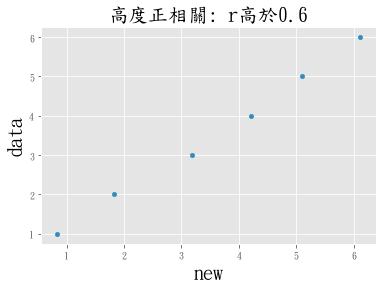

In [42]:
dfmm.plot(kind='scatter',x='new'  ,y='data' , figsize=(6,4))
plt.title('高度正相關: r高於0.6',color='black',size=20)
plt.xlabel('new',size=20,color='black')
plt.ylabel('data',color='black',size=20)

Text(0,0.5,'data')

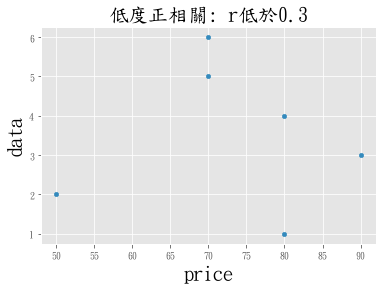

In [45]:
dfmm.plot(kind='scatter',x='price'  ,y='data' , figsize=(6,4))
plt.title('低度正相關: r低於0.3',color='black',size=20)
plt.xlabel('price',size=20,color='black')
plt.ylabel('data',color='black',size=20)

In [46]:
dfmm

,data,key,price,new
0,1,A,80,0.827833
1,2,B,50,1.822960
2,3,C,90,3.182195
3,4,A,80,4.211259
4,5,B,70,5.107089
5,6,C,70,6.114232
